In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

### Loading data

In [2]:
data = pd.read_csv('./casts.csv', ';', header=None)

In [3]:
data.head(10)

,0,1,2,3,4
0,AA13,Pygmalion,Leslie Howard,Sci,"R:smug professor ""Higgins"""
1,AA13,Pygmalion,Wendy Hiller,Inn,"R:flower girl ""Eliza"""
2,AA13,Pygmalion,Wilfrid Lawson,Und,"R:friend ""Dolittle"""
3,AA13,Pygmalion,Scott Sunderland,Und,"R:betting Colonel ""Pickering"""
4,AA13,Pygmalion,Marie Lohr,Und,"R:wife ""Mrs.Higgins"""
5,AA13,Pygmalion,David Tree,Und,RU:
6,AA13,Pygmalion,Esme Percy,Und,RU:
7,AA13,Pygmalion,Everley Gregg,Und,RU:
8,AA13,Pygmalion,Jean Cadell,Und,RU:
9,AA14,French Without Tears,Ray Milland,Und,RZ:schoolboy


### Preprocessing

In [4]:
actors = list(set(list(data[2].dropna())))

In [5]:
len(actors)

16614

In [6]:
actors[:10]

['Florence Turner',
 'Harriett Hilliard',
 'Glenn Anders',
 'Jimmi Harkishin',
 'Jake',
 'Kay Nebel',
 'Stephen d. Newman',
 'Lucca Rossi',
 'Michael Kearney',
 'Mahalia Jackson']

In [40]:
movies_to_actors = {}
for index, row in data.iterrows():
    movie = row[1]
    actor = row[2]
    if not pd.isnull(actor) and not pd.isnull(movie) and actor != 's a':
        if movie not in movies_to_actors:
            movies_to_actors[movie] = []
        movies_to_actors[movie].append(actor)

In [8]:
movies_to_actors['Pygmalion']

['Leslie Howard',
 'Wendy Hiller',
 'Wilfrid Lawson',
 'Scott Sunderland',
 'Marie Lohr',
 'David Tree',
 'Esme Percy',
 'Everley Gregg',
 'Jean Cadell',
 'Lily Bouwmeester',
 'Eduard Verkade',
 'Johann deMeester',
 'Jenny Ingo',
 'Gustaf Grundgens']

In [9]:
relations = set()
for movie, actors in movies_to_actors.items():
    n = len(actors)
    for i in range(n-1):
        for j in range(i, n):
            if actors[i] in actors and actors[j] in actors:
                relations.add((actors[i], actors[j]))

In [10]:
relations

{('Woody Allen', 'Gene Hackman'),
 ('Paul Rogers', 'Paul Rogers'),
 ('Suzy Parker', 'Marie Windsor'),
 ('William Holden', 'Adele Jergens'),
 ('Brenda Vaccar', 'Brenda Vaccar'),
 ('Julia Adams', 'Arthur Kennedy'),
 ('Reginald Denny', 'Lisa Howard'),
 ('Desmond Llewellyn', 'Kristina Wayborn'),
 ('Ethan Randall', 'Harley Jane Kozak'),
 ('John Carradine', 'William vonBrincken'),
 ('Jeremy Slate', 'Abraham Sofaer'),
 ('Frank Reicher', 'René Auberjonois'),
 ('Rocelle Hudson', 'Spring Byington'),
 ('Michael Wilding', 'Frances Mercer'),
 ('Frank Lanning', 'Hart Hoxie'),
 ('Alwyn Kurts', 'Eric Pearce'),
 ('Boris Karloff', 'Ernest Torence'),
 ('Brynja McGrady', 'Sam Shamstak'),
 ('Michael Chiklis', 'Maria Ford'),
 ('Gary Busey', 'Chris Pedersen'),
 ('George Couloris', 'Rosalind Ivan'),
 ('Victoria Hopper', 'Lyn Harding'),
 ('Rip Torn', 'Marie Windsor'),
 ('Frank Albertson', 'Jane Darwell'),
 ('Monty Woolley', 'Beverly Whitney'),
 ('Pat OBrien', 'Nehemiah Persoff'),
 ('Clem Bevans', 'Joe Vitale')

### Creating graph

In [11]:
G = nx.Graph()

In [12]:
G.add_nodes_from(actors)

In [13]:
G.add_edges_from(relations)

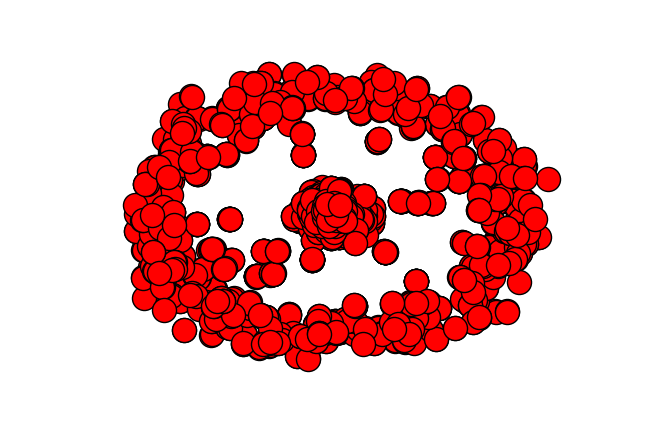

In [48]:
nx.draw(G)
plt.show()

In [14]:
print(len(G.nodes()), len(G.edges()))

16286 165987


In [15]:
nx.density(G)

0.001251704685712493

In [16]:
nx.number_connected_components(G)

422

### Calculating centralities

In [20]:
centralities = [nx.degree_centrality, nx.closeness_centrality,
 nx.betweenness_centrality, nx.eigenvector_centrality]

In [23]:
degree_cent = nx.degree_centrality(G)

In [50]:
closeness_cent = nx.closeness_centrality(G)

KeyboardInterrupt: 

In [51]:
betweenness_cent = nx.betweenness_centrality(G)

KeyboardInterrupt: 

In [58]:
eigenvector_cent = nx.eigenvector_centrality(G)

In [49]:
sorted(degree_cent.items(), key=lambda x:x[1])[:10]

[('Jean-Pierre Aumont', 6.140620202640467e-05),
 ('RSichard Kiely', 6.140620202640467e-05),
 ('Federico Pizalis', 6.140620202640467e-05),
 ('John Farrar', 6.140620202640467e-05),
 ('Jonna lee', 6.140620202640467e-05),
 ('Beulah Booker', 6.140620202640467e-05),
 ('Martha Krivitz', 6.140620202640467e-05),
 ('Hazel Goodman', 6.140620202640467e-05),
 ('David Duhovny', 6.140620202640467e-05),
 ('Elba Escobar', 6.140620202640467e-05)]

In [ ]:
sorted(closeness_cent.items(), key=lambda x:x[1])[:10]

In [ ]:
sorted(betweenness_cent.items(), key=lambda x:x[1])[:10]

In [59]:
sorted(eigenvector_cent.items(), key=lambda x:x[1])[:10]

[('Henrik Galeen', 1.370253215258031e-29),
 ('Tatsya Nakadai', 1.370253215258031e-29),
 ('Fabienne Babe', 1.370253215258031e-29),
 ('Eric Stern', 1.370253215258031e-29),
 ('1933', 1.370253215258031e-29),
 ('Federico Pizalis', 8.358544613073984e-27),
 ('John Farrar', 8.358544613073984e-27),
 ('Beulah Booker', 8.358544613073984e-27),
 ('Elba Escobar', 8.358544613073984e-27),
 ('Cris Avram', 8.358544613073984e-27)]

### „Kevin Bacon“ numbers

In [57]:
KB_numbers = []
i, n = 0, nx.number_of_nodes (G)
for node in G.nodes_iter(data=False):
    KB_numbers.append((node, nx.single_source_dijkstra_path_length(G, node, cutoff=None)))
    print(i, '/', n, ' nodes processed.')
    i += 1

0 / 16286
1 / 16286
2 / 16286
3 / 16286
4 / 16286
5 / 16286
6 / 16286
7 / 16286
8 / 16286
9 / 16286
10 / 16286
11 / 16286
12 / 16286
13 / 16286
14 / 16286
15 / 16286
16 / 16286
17 / 16286
18 / 16286
19 / 16286
20 / 16286
21 / 16286
22 / 16286
23 / 16286
24 / 16286
25 / 16286
26 / 16286
27 / 16286
28 / 16286
29 / 16286
30 / 16286
31 / 16286
32 / 16286
33 / 16286
34 / 16286
35 / 16286
36 / 16286
37 / 16286
38 / 16286
39 / 16286
40 / 16286
41 / 16286
42 / 16286
43 / 16286
44 / 16286
45 / 16286
46 / 16286
47 / 16286
48 / 16286
49 / 16286
50 / 16286
51 / 16286
52 / 16286
53 / 16286
54 / 16286
55 / 16286
56 / 16286
57 / 16286
58 / 16286
59 / 16286
60 / 16286
61 / 16286
62 / 16286
63 / 16286
64 / 16286
65 / 16286
66 / 16286
67 / 16286
68 / 16286
69 / 16286
70 / 16286
71 / 16286
72 / 16286
73 / 16286
74 / 16286
75 / 16286
76 / 16286
77 / 16286
78 / 16286
79 / 16286
80 / 16286
81 / 16286
82 / 16286
83 / 16286
84 / 16286
85 / 16286
86 / 16286
87 / 16286
88 / 16286
89 / 16286
90 / 16286
91 / 1628

KeyboardInterrupt: 

In [ ]:
sorted(KB_numbers.items(), key=lambda x:x[1])[:10]

In [ ]:
sum(KB_numbers.values())/len(KB_numbers.values())

### Exporting graph to CSV for visualization

In [ ]:
text = ''
for pair in relations:
    text += "'" + pair[0] + ";'" + pair[1] + "'" + "\n"
with open('relations.csv', 'w') as file:
    file.write(text)

#### Extract films with less than 4 actors

In [33]:
movies_to_actors_4 = {}
for movie, actors in movies_to_actors.items():
    if len(actors) < 4:
        movies_to_actors_4[movie] = actors

In [34]:
actors_4 = set()
for movie, actors in movies_to_actors_4.items():
    for actor in actors:
        actors_4.add(actor)

In [35]:
relations_4 = set()
for movie, actors in movies_to_actors_4.items():
    n = len(actors)
    for i in range(n-1):
        for j in range(i, n):
            if actors[i] in actors and actors[j] in actors:
                relations_4.add((actors[i], actors[j]))

#### Export graph to CSV

In [37]:
text = ''
for pair in relations_4:
    text += "'" + pair[0] + ";'" + pair[1] + "'" + "\n"
with open('relations_4.csv', 'w') as file:
    file.write(text)

#### Extract films starting with letter 'P'

In [44]:
movies_to_actors_p = {}
for movie, actors in movies_to_actors.items():
    if movie.startswith('P'):
        movies_to_actors_p[movie] = actors

In [45]:
actors_p = set()
for movie, actors in movies_to_actors_p.items():
    for actor in actors:
        actors_p.add(actor)

In [46]:
relations_p = set()
for movie, actors in movies_to_actors_p.items():
    n = len(actors)
    for i in range(n-1):
        for j in range(i, n):
            if actors[i] in actors and actors[j] in actors:
                relations_p.add((actors[i], actors[j]))

#### Export graph to CSV

In [47]:
text = ''
for pair in relations_p:
    text += "'" + pair[0] + ";'" + pair[1] + "'" + "\n"
with open('relations_p.csv', 'w') as file:
    file.write(text)